# PheWas and Data Manipulation

Import libraries and map

In [1]:
import pandas as pd
import numpy as np
from phemap import Phemap
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns
import math
from tabulate import tabulate

In [2]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [3]:
def normalise(x):
    return (x - np.mean(x)) / np.std(x)

In [4]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

## Add age and gender

In [5]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb45494.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,12,39,40,42,43,44,45,46,198,200,220,222,224,226,228,230,232,234,236,366,367,2409,2412,2422,2425,2435,2438,2448,2451,2461,2464,2474,2477,2487,2490,2500,2503,2513,2516,2525,2526,2528,2529,2539,2542,2551,2552,2554,2555,2565,2568,2578,2581,2591,2594,2604,2607,2617,2620,2629,2630,2632,2633,2643,2646,2656,2659,2669,2672,2682,2685,2695,2698,2707,2708,2710,2711,2721,2724,2734,2737,2747,2750,2759,2760,2762,2763,2772,2773,2775,2776,2785,2786,2788,2789,2798,2799,2801,2802,2813,2820,2827,2828,2835,2836,3050,3258) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#imaging=pd.read_csv("I:/UKB_DATA/raw/hw/hwpheno.tsv", sep='\t',index_col=0)
imaging=pd.read_csv("I:/UKB_DATA/raw/hw/sphericity.tsv", sep='\t',index_col=0)
#imaging=pd.read_csv("I:/UKB_DATA/normal/h/normal_lv_height.tsv", sep='\t')
#imaging=pd.read_csv("I:/UKB_DATA/normal/w/normal_lv_width.tsv", sep='\t')

In [7]:
#imaging['hw']=imaging['pheno']

In [8]:
gender = []
for idx in imaging['idx']:
    gender.append(np.array(df[df['eid']==idx]['31-0.0']))

In [9]:
imaging

,idx,hw
0,1000012,0.554688
1,1000158,0.500469
3,1000262,0.623461
4,1000369,0.604089
5,1000489,0.554631
...,...,...
36263,6024290,0.524194
36264,6024323,0.544689
36265,6024624,0.513704
36266,6024638,0.736336


In [10]:
gender

[array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array

In [11]:
imaging['gender']=np.stack(gender).reshape(-1)

In [12]:
age = []
for idx in imaging['idx']:
    age.append(np.array(df[df['eid']==idx]['21003-0.0']))

In [13]:
imaging['age']=np.stack(age).reshape(-1)

In [14]:
imaging 

,idx,hw,gender,age
0,1000012,0.554688,0.0,59.0
1,1000158,0.500469,1.0,44.0
3,1000262,0.623461,0.0,58.0
4,1000369,0.604089,0.0,60.0
5,1000489,0.554631,1.0,66.0
...,...,...,...,...
36263,6024290,0.524194,1.0,41.0
36264,6024323,0.544689,0.0,56.0
36265,6024624,0.513704,0.0,44.0
36266,6024638,0.736336,0.0,65.0


In [15]:
imaging.to_csv("hw_sex_age.csv",index=False)

# PheWas

Read non-imaging phenotypes

In [16]:
with open(r"patient_diag", "rb") as input_file:
    non_imaging = pickle.load(input_file)
len(non_imaging)

502461

Read imaging phenotypes

In [17]:
imaging = pd.read_csv("hw_sex_age.csv")
len(imaging)

31717

Filter the patients for imaging and non-imaging

Contract Ids

In [18]:
relevant_ids = np.array(imaging['idx'])
ef1 = np.array([])
ef2 = np.array([])
lved1 = np.array([])
lved2 = np.array([])

Contracted array

## Exclude imaging phenotypes that are abnormal
* LVEF 48 - 70% 
* LVEDV 88 - 218
* LVESV 31 - 97

In [19]:
df=df[['eid', '22420-2.0', '22420-3.0', '22421-2.0','22421-3.0','22422-2.0','22422-3.0']]
df=df.rename(columns={'eid':'idx',
                    '22420-2.0':'EF1',
                    '22420-3.0':'EF2',
                    '22421-2.0':"LVED1",
                   "22421-3.0":"LVED2",
                   "22422-2.0":"LVES1",
                   "22422-3.0":"LVES2"
                  })
df = pd.merge(imaging,df,on='idx')
df

,idx,hw,gender,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000012,0.554688,0.0,59.0,45.0,NaN,125.0,NaN,68.0,NaN
1,1000158,0.500469,1.0,44.0,52.0,NaN,130.0,NaN,62.0,NaN
2,1000262,0.623461,0.0,58.0,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,0.604089,0.0,60.0,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,0.554631,1.0,66.0,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...
31712,6024290,0.524194,1.0,41.0,50.0,NaN,177.0,NaN,89.0,NaN
31713,6024323,0.544689,0.0,56.0,68.0,NaN,86.0,NaN,28.0,NaN
31714,6024624,0.513704,0.0,44.0,57.0,NaN,128.0,NaN,55.0,NaN
31715,6024638,0.736336,0.0,65.0,42.0,NaN,136.0,NaN,79.0,NaN


In [20]:
lv_associated = df

In [21]:
lv_associated['LVED1'] = lv_associated['LVED1'].fillna(90)
lv_associated['LVED2'] = lv_associated['LVED2'].fillna(90)

In [22]:
lv_associated=lv_associated.fillna(60)

In [23]:
lv_associated

,idx,hw,gender,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000012,0.554688,0.0,59.0,45.0,60.0,125.0,90.0,68.0,60.0
1,1000158,0.500469,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
2,1000262,0.623461,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,0.604089,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,0.554631,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...,...
31712,6024290,0.524194,1.0,41.0,50.0,60.0,177.0,90.0,89.0,60.0
31713,6024323,0.544689,0.0,56.0,68.0,60.0,86.0,90.0,28.0,60.0
31714,6024624,0.513704,0.0,44.0,57.0,60.0,128.0,90.0,55.0,60.0
31715,6024638,0.736336,0.0,65.0,42.0,60.0,136.0,90.0,79.0,60.0


In [24]:
np.array(lv_associated['EF2'])[0]>30

True

In [25]:
exclude = (np.array(lv_associated['EF1'])<48) | \
(np.array(lv_associated['EF1'])>70) | \
(np.array(lv_associated['EF2'])<48) | \
(np.array(lv_associated['EF2'])>70) | \
(np.array(lv_associated['LVED1'])<88) | \
(np.array(lv_associated['LVED1'])>218) | \
(np.array(lv_associated['LVED2'])<88) | \
(np.array(lv_associated['LVED2'])>218) | \
(np.array(lv_associated['LVES1'])<31) | \
(np.array(lv_associated['LVES1'])>93) | \
(np.array(lv_associated['LVES2'])<31) | \
(np.array(lv_associated['LVES2'])>93)

In [26]:
#imaging = imaging[~exclude]

In [27]:
to_delete=[]
for idx in non_imaging:
    if(not(idx in np.array(imaging['idx']))):
        to_delete.append(idx)

In [28]:
for idx in to_delete:
    del non_imaging[idx]

In [29]:
cnt=0
for idx in imaging['idx']:
    if(not(idx in non_imaging)):
        imaging=imaging.drop(cnt)
    cnt+=1

In [30]:
len(imaging)

31716

In [31]:
len(non_imaging)

31716

Normalize and adjust for confounding factors

In [32]:
imaging

,idx,hw,gender,age
0,1000012,0.554688,0.0,59.0
1,1000158,0.500469,1.0,44.0
2,1000262,0.623461,0.0,58.0
3,1000369,0.604089,0.0,60.0
4,1000489,0.554631,1.0,66.0
...,...,...,...,...
31712,6024290,0.524194,1.0,41.0
31713,6024323,0.544689,0.0,56.0
31714,6024624,0.513704,0.0,44.0
31715,6024638,0.736336,0.0,65.0


In [33]:
conf = np.stack((imaging['gender'], imaging['age']), axis=1)
conf = (conf - np.mean(conf, axis=0)) / np.std(conf, axis=0)

In [34]:
n_row = conf.shape[1]
n_col = imaging.shape[1]
beta = np.zeros((n_row, n_col))
i=1
x = imaging.iloc[:, i]
beta[:, i] = np.dot(np.linalg.pinv(conf), x)
x = x - np.dot(conf, beta[:, i])
x = normalise(x)
imaging.iloc[:, i] = x

In [35]:
imaging

,idx,hw,gender,age
0,1000012,-0.649371,0.0,59.0
1,1000158,-1.220388,1.0,44.0
2,1000262,0.702776,0.0,58.0
3,1000369,0.289288,0.0,60.0
4,1000489,-0.588156,1.0,66.0
...,...,...,...,...
31712,6024290,-0.703520,1.0,41.0
31713,6024323,-0.786245,0.0,56.0
31714,6024624,-1.159048,0.0,44.0
31715,6024638,2.757947,0.0,65.0


Patients filtered now

In [36]:
all_codes=phemap.get_all_phecodes()

In [37]:
all_phe_codes=[]

In [38]:
for i in range(len(all_codes)):
    all_phe_codes.append(all_codes[i]['phecode'])

In [39]:
PheWasDic = {}
PheWasDic['idx'] = np.array(imaging['idx'])
PheWasDic['pheno'] = np.array(imaging['hw'])

In [40]:
for phecode in all_phe_codes:
    diagnosed = []
    for patient in non_imaging:
        if (phecode in non_imaging[patient]):
            diagnosed.append(1)
        else:
            diagnosed.append(0)  
    PheWasDic[phecode] = np.array(diagnosed)

In [41]:
PheWasDic

{'idx': array([1000012, 1000158, 1000262, ..., 6024624, 6024638, 6024797],
       dtype=int64),
 'pheno': array([-0.64937134, -1.22038848,  0.70277622, ..., -1.159048  ,
         2.75794732,  0.09971918]),
 '008': array([0, 0, 0, ..., 0, 0, 0]),
 '008.5': array([0, 0, 0, ..., 0, 0, 0]),
 '008.51': array([0, 0, 0, ..., 0, 0, 0]),
 '008.52': array([0, 0, 0, ..., 0, 0, 0]),
 '008.6': array([0, 0, 0, ..., 0, 0, 0]),
 '008.7': array([0, 0, 0, ..., 0, 0, 0]),
 '010': array([0, 0, 0, ..., 0, 0, 0]),
 '031': array([0, 0, 0, ..., 0, 0, 0]),
 '031.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038': array([0, 0, 0, ..., 0, 0, 0]),
 '038.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038.2': array([0, 0, 0, ..., 0, 0, 0]),
 '038.3': array([0, 0, 0, ..., 0, 0, 0]),
 '041': array([0, 0, 0, ..., 0, 0, 0]),
 '041.1': array([0, 0, 0, ..., 0, 0, 0]),
 '041.11': array([0, 0, 0, ..., 0, 0, 0]),
 '041.12': array([0, 0, 0, ..., 0, 0, 0]),
 '041.2': array([0, 0, 0, ..., 0, 0, 0]),
 '041.21': array([0, 0, 0, ..., 0, 0, 0]),
 

In [42]:
dfp =pd.DataFrame.from_dict(PheWasDic)

In [43]:
dfp.to_csv("phewas.csv")

In [44]:
dfp

,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,031,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,1000012,-0.649371,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000158,-1.220388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000262,0.702776,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000369,0.289288,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000489,-0.588156,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31711,6024290,-0.703520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31712,6024323,-0.786245,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31713,6024624,-1.159048,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31714,6024638,2.757947,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Table structure:
eid___hw___phenocode1___phenocode2.....
eid, float,

## Perform PheWas

In [45]:
phe_table = pd.read_csv("phewas.csv")

In [46]:
phe_table

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,986,987,988,989,990,994,994.1,994.2,994.21,996
0,0,1000012,-0.649371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1000158,-1.220388,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000262,0.702776,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1000369,0.289288,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1000489,-0.588156,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31711,31711,6024290,-0.703520,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31712,31712,6024323,-0.786245,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31713,31713,6024624,-1.159048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31714,31714,6024638,2.757947,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Additional quant traits are:
* systolic_pressure
* diastolic_pressure
* pulse_rate

In [47]:
quant_traits=pd.read_csv("quant_traits.csv")

In [48]:
quant_traits

,idx,systolic_pressure,diastolic_pressure,pulse_rate
0,1000012,138.0,68.0,72.0
1,1000158,153.0,95.0,68.0
2,1000262,130.0,73.0,71.0
3,1000369,141.0,83.0,80.0
4,1000489,145.0,89.0,66.0
...,...,...,...,...
31711,6024290,132.0,85.0,62.0
31712,6024323,122.0,65.0,75.0
31713,6024624,NaN,NaN,NaN
31714,6024638,136.0,94.0,69.0


In [49]:
phe_table = pd.merge(phe_table,quant_traits, on ='idx')

In [50]:
phe_table
#    temp = phe_table[['pheno', phecode]].dropna()

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,989,990,994,994.1,994.2,994.21,996,systolic_pressure,diastolic_pressure,pulse_rate
0,0,1000012,-0.649371,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,138.0,68.0,72.0
1,1,1000158,-1.220388,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,153.0,95.0,68.0
2,2,1000262,0.702776,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,130.0,73.0,71.0
3,3,1000369,0.289288,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,141.0,83.0,80.0
4,4,1000489,-0.588156,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145.0,89.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31711,31711,6024290,-0.703520,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,132.0,85.0,62.0
31712,31712,6024323,-0.786245,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,122.0,65.0,75.0
31713,31713,6024624,-1.159048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
31714,31714,6024638,2.757947,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,136.0,94.0,69.0


Normalize

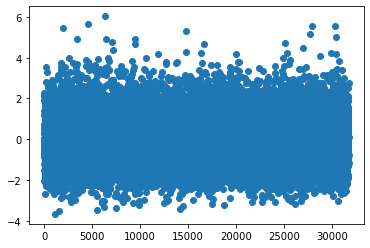

In [51]:
plt.scatter(np.arange(len(phe_table['pheno'])),phe_table['pheno'])

# PERFORM THE ASSOCIATION

In [52]:
results = {}

In [53]:
results['phecode'] = np.array(phe_table.columns[3:])

In [54]:
ccs = []
p_vals = []
for phecode in phe_table.columns[3:]:
    temp = phe_table[['pheno', phecode]].dropna()
    cc, p_val = scipy.stats.pearsonr(temp['pheno'], temp[phecode])
    ccs.append(cc)
    p_vals.append(p_val)
    
results['ccs']=ccs
results['p_vals']=p_vals

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is consta

In [55]:
results = pd.DataFrame.from_dict(results)

Drop Nans

In [56]:
results = results.dropna()

In [57]:
results

,phecode,ccs,p_vals
64,110.1,0.001056,8.507748e-01
65,110.11,-0.000605,9.142349e-01
66,110.12,0.006847,2.227148e-01
67,110.13,0.000215,9.695285e-01
71,112.3,0.002694,6.313752e-01
...,...,...,...
1843,972.2,0.004949,3.781104e-01
1863,994.2,0.012267,2.891784e-02
1866,systolic_pressure,0.019576,7.728722e-04
1867,diastolic_pressure,0.019881,6.382373e-04


In [58]:
log_corr_p = - np.log10(results['p_vals'])

In [59]:
log_corr_p

64       0.070185
65       0.038942
66       0.652251
67       0.013439
71       0.199712
          ...    
1843     0.422381
1863     1.538834
1866     3.111892
1867     3.195018
1868    19.341605
Name: p_vals, Length: 963, dtype: float64

In [60]:
results['log_cor']=log_corr_p

In [61]:
results.to_csv("hw_phewas_results.csv",index=False)

# ANalyize and Plot


Bonferroni correction

In [62]:
results=pd.read_csv("hw_phewas_results.csv")

In [63]:
len(results)

963

In [64]:
p_bonf = 0.05 / len(phemap.get_all_phecodes())

In [65]:
p_bonf

2.679528403001072e-05

In [66]:
print('Number of correlations reaching Bonferroni threshold = {0}'.format(np.sum(results['p_vals'] < p_bonf)))

Number of correlations reaching Bonferroni threshold = 15


In [67]:
relevant = np.array(results[results['p_vals']<p_bonf])

In [68]:
relevant

array([['272.11', 0.030321106510898307, 6.630345248099112e-08,
        7.178463856898315],
       ['278.1', 0.04255352920839254, 3.416152222062438e-14,
        13.4664627856034],
       ['394.2', 0.03677694129864752, 5.693964797443118e-11,
        10.244585222177376],
       ['395.1', 0.035796180846925575, 1.809098586957957e-10,
        9.742537765586189],
       ['401.1', 0.04385056363731667, 5.593529153566312e-15,
        14.2523140940271],
       ['411.2', 0.044856593076179126, 1.3253839696032776e-15,
        14.877658286464813],
       ['411.3', 0.025508208043992425, 5.537680712681722e-06,
        5.256672088084469],
       ['411.4', 0.037221474130776935, 3.338641752291534e-11,
        10.476430179732702],
       ['411.8', 0.034082765967273415, 1.2686332141570049e-09,
        8.896663922501633],
       ['425.1', 0.037820122707618656, 1.6110681726805944e-11,
        10.792886081931758],
       ['427.11', 0.03185882432078964, 1.3872874108277604e-08,
        7.857833554784124],
      

In [69]:
table = []
table.append(["PheCode", "CorCoef", "P_VAL"])
for p in relevant:
    try:
        table.append([phemap.get_phecode_info(p[0])['phenotype'], p[1] ,p[2]])
    except:
        table.append([p[0], p[1] ,p[2]])


In [70]:
print(tabulate(table))

-------------------------------------------------  ---------------------  ----------------------
PheCode                                            CorCoef                P_VAL
Hypercholesterolemia                               0.030321106510898307   6.630345248099112e-08
Obesity                                            0.04255352920839254    3.416152222062438e-14
Mitral valve disease                               0.03677694129864752    5.693964797443118e-11
Nonrheumatic mitral valve disorders                0.035796180846925575   1.809098586957957e-10
Essential hypertension                             0.04385056363731667    5.593529153566312e-15
Myocardial infarction                              0.044856593076179126   1.3253839696032776e-15
Angina pectoris                                    0.025508208043992425   5.537680712681722e-06
Coronary atherosclerosis                           0.037221474130776935   3.338641752291534e-11
Other chronic ischemic heart disease, unspecified  0.0

In [71]:
categories = []
for i in range(len(results)):
    try:
        categories.append(phemap.get_phecode_info(results['phecode'][i])['category'])
    except:
        categories.append("quant measurements")

In [72]:
results['categories']=categories
results.to_csv("hw_phewas_results.csv",index=False)

In [73]:
len(np.unique(results['categories']))

18

In [74]:
pal1 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue']


In [75]:
pal2 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green']


In [76]:
pal3 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green','red']

In [77]:
results.to_csv("phewas_results.csv",index=False)

In [78]:
markers=["^","v"]
positive_cor = results[results['ccs']>0]
negative_cor = results[results['ccs']<0]
significant = results[results['p_vals']<p_bonf]
sns.scatterplot(x=positive_cor['phecode'].index, y=positive_cor['log_cor'], size=np.abs(positive_cor['ccs']),
                     hue=positive_cor['categories'],sizes=(30, 80), 
                     alpha=0.8, palette=pal2, marker="^", ec="face")
sns.scatterplot(x=negative_cor['phecode'].index, y=negative_cor['log_cor'], size=np.abs(negative_cor['ccs']), hue=negative_cor['categories'],
                     sizes=(30, 80), 
                     alpha=0.8, palette=pal3, marker="v", ec="face")

plt.plot([0, 1000], [-math.log10(p_bonf), -math.log10(p_bonf)], 'k--', linewidth=1, alpha=0.8)
for index, sig in significant.iterrows():
    try:
        name= phemap.get_phecode_info(sig['phecode'])['phenotype']
    except:
        name = sig['phecode']
        
    plt.text(x= index,
             y= sig['log_cor'],
             s = name,
             fontdict=dict(color='black',size=4)) 
    
plt.ylabel('-log_10(p)')
plt.legend([])
plt.grid()
plt.savefig("foo2.png",dpi=200)

ValueError: The palette list has the wrong number of colors.

In [ ]:
p_bonf

In [ ]:
np.unique(results['categories'])

# Get EF LVED and LVES

22420-2.0 and 22420-3.0 Ejection Fraction <br>
22421	LV end diastolic volume <br>
22422   Left ventricular size and function  


In [ ]:
isIn = []
for idx in np.array(df['eid']):
    isIn.append(idx in np.array(imaging['idx']))

In [ ]:
df=df[isIn]

In [ ]:
df.to_csv("main_df_relevant_ids.csv",index=False)

In [ ]:
df['22420-2.0']

In [ ]:
df = pd.read_csv("main_df_relevant_ids.csv")

In [ ]:
new_dic = {
"idx" : np.array(df['eid']),
"EF1" : np.array(df['22420-2.0']),
"EF2" : np.array(df['22420-3.0']),
"LVED1": np.array(df['22421-2.0']),
"LVED2": np.array(df['22421-3.0']),
"LVES1": np.array(df['22422-2.0']),
"LVES2": np.array(df['22422-3.0'])
}

In [ ]:
pd.DataFrame.from_dict(new_dic).to_csv("main_df_relevant_ids.csv",index=False)

## Plot hw differences

In [79]:
import pandas as pd
from utils import exclude_abnormal
import matplotlib.pyplot as plt
import numpy as np

In [80]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb47615.csv",sep='\t')

1. Identify phecode 
    * Cardiomyopathy 
    [425.0, 425.1, 425.11, 425.12, 425.2,425.8]
 
    * Atrial fibrillation
    [427.2, 427.21, 427.22]
    * Heart failures [427.4,
 427.42,]
    
    * Type 2 Diabetes 
   [250.2,
 250.21,
 250.22,
 250.23,
 250.24,
 250.25]
    * Hypertension 
[401.0, 401.1, 401.2, 401.21, 401.22, 401.3]

    * Chronic kidney disease 
[585.0,
 585.1,
 585.2,
 585.3,
 585.31,
 585.32,
 585.33,
 585.34,
 585.4]
    * Aortic valve disease	394‑399.99
[394.0,
 394.1,
 394.2,
 394.3,
 394.4,
 394.7,
 395.0,
 395.1,
 395.2,
 395.3,
 395.4,
 395.6]
    * Carditis [420.0, 420.1, 420.2, 420.21, 420.22, 420.3]
    * AV Node Distal Con disease
 [426.0, 426.2,426.21,426.22,426.23,426.24]
2. divide ids in the group and compute mean and std for all


In [81]:
cariomyopathy = [425, 425.1, 425.11, 425.12, 425.2,425.8]
atrial_fib = [427.2, 427.21, 427.22]
heart_failures = [427.4, 427.42]
diabetes =  [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
hypertension = [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
chronic_kidney_disease = [585, 585.1, 585.2, 585.3, 585.31, 585.32, 585.33, 585.34, 585.4]
aortic_valve_disease = [394, 394.1, 394.2, 394.3, 394.4, 394.7, 395, 395.1, 395.2, 395.3, 395.4, 395.6]
carditis = [420, 420.1, 420.2, 420.21, 420.22, 420.3]
av_node = [426, 426.2,426.21,426.22,426.23,426.24]

In [82]:
def get_ids(phe_codes):
    
    phe_table=pd.read_csv("phewas.csv")
    ids = phe_table[str(phe_codes[0])]
    for code in phe_codes:
        ids |= phe_table[str(code)]
    return np.array(ids)==1

In [83]:
df=pd.read_csv("I:/UKB_DATA/raw/hw/sphericity.tsv", sep='\t',index_col=0)
len(df)

31717

In [105]:
df['hw']=1/df['hw']
#df.to_csv("I:/UKB_DATA/raw/hw/sphericity.tsv", sep='\t')

In [110]:
def get_pheno(ids):
    df=pd.read_csv("I:/UKB_DATA/raw/hw/sphericity.tsv", sep='\t',index_col=0)
    df=df[~(df['idx']==1273917)]
    df['hw'] = 1/df['hw']
    return np.array(df[ids]['hw'])

In [111]:
cariomyopathy_ids=get_ids(cariomyopathy)
artrial_fib_ids=get_ids(atrial_fib)
heart_failures_ids=get_ids(heart_failures)
diabetes_ids=get_ids(diabetes)
hypertension_ids=get_ids(hypertension)
chronic_kidney_disease_ids=get_ids(chronic_kidney_disease)
aortic_valve_disease_ids = get_ids(aortic_valve_disease)
carditis_ids=get_ids(carditis)
av_node_ids=get_ids(av_node)

In [112]:
len(cariomyopathy_ids)

31716

In [113]:
normal= cariomyopathy_ids | artrial_fib_ids | heart_failures_ids | diabetes_ids | hypertension_ids | chronic_kidney_disease_ids | aortic_valve_disease_ids | carditis_ids | av_node_ids
normal = ~ normal

In [114]:
np.array(cariomyopathy_ids)==1

array([False, False, False, ..., False, False, False])

In [115]:
cardiomyopathy_hw=get_pheno(cariomyopathy_ids)
artrial_fib_hw=get_pheno(artrial_fib_ids)
heart_failures_hw= get_pheno(heart_failures_ids)
diabetes_hw = get_pheno(diabetes_ids)
hypertension_hw = get_pheno(hypertension_ids)
chronic_kidney_disease_hw = get_pheno(chronic_kidney_disease_ids)
aortic_valve_disease_hw = get_pheno(aortic_valve_disease_ids)
carditis_hw = get_pheno(carditis_ids)
av_node_hw = get_pheno(av_node_ids)
normal_hw = get_pheno(normal)

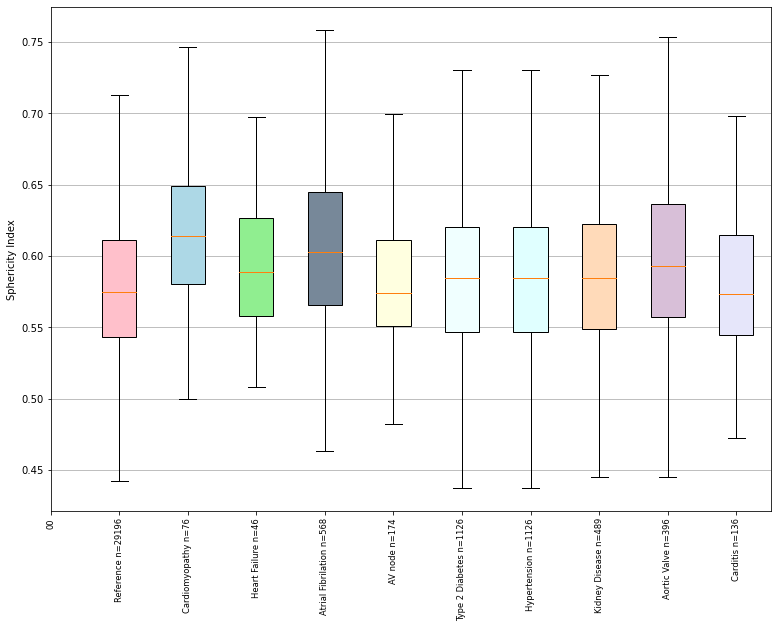

In [116]:
data = [normal_hw, cardiomyopathy_hw, heart_failures_hw, artrial_fib_hw, av_node_hw, diabetes_hw, hypertension_hw, chronic_kidney_disease_hw, aortic_valve_disease_hw,carditis_hw,]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
plt.ylabel("Sphericity Index")
# Creating plot
bp = ax.boxplot(data,showfliers=False,patch_artist=True,meanline=True)
t11 = ['00', f'Reference n={len(normal_hw)}', f'Cardiomyopathy n={len(cardiomyopathy_hw)}',
       f'Heart Failure n={len(heart_failures_hw)}', f'Atrial Fibrilation n={len(artrial_fib_hw)}',
       f'AV node n={len(av_node_hw)}',  f'Type 2 Diabetes n={len(diabetes_hw)}', f'Hypertension n={len(hypertension_hw)}',
       f'Kidney Disease n={len(chronic_kidney_disease_hw)}',f'Aortic Valve n={len(aortic_valve_disease_hw)}',f'Carditis n={len(carditis_hw)}']

ax.yaxis.grid(True)
colors = ['pink', 'lightblue', 'lightgreen', 'lightslategray', 'lightyellow', 'azure','lightcyan','peachpuff','thistle','lavender']
plt.xticks(range(len(t11)), t11, size='small',rotation='vertical')
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
#plt.title("Differences in HW pheno")
plt.savefig("diffplot")

## Correlation between quant vars

In [ ]:
a = np.array(phe_table['systolic_pressure'])
b = np.array(phe_table['diastolic_pressure'])
c = np.array(phe_table['pulse_rate'])

In [ ]:
#cor(a,c)
#cor(b,c)
#cor(a,b)

In [ ]:
def cor(a,b):
    include = ( (a == a) & (b==b) )
    a=a[include]
    b=b[include]
    return scipy.stats.pearsonr(a, b)